# Playing with registration (scikit-image) 

In [2]:
import glob
from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact

/Users/j35/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import pyfits
import os

In [4]:
from PIL import Image
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from pprint import pprint

In [7]:
import skimage
from skimage.feature import register_translation

NB: The input data must be fits

## 1. Loading the data 

Make sure the data have been loaded in the right order, and cropped if necessary (see **users_ipython_notbeook** for such notebooks)

### a. Select input folder

In [8]:
%gui qt
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [9]:
%gui qt
raw_data_folder = str(gui_fname())
%matplotlib inline

### b. Load the data

#### FITS images

In [10]:
list_of_files = glob.glob(raw_data_folder + '/*.fits')

In [11]:
pprint(list_of_files)

['/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_0.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_1.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_10.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_100.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_101.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_102.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_103.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_104.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_105.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_106.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_107.fits',
 '/Users/j35/Desktop/Registration_sample/RawData/LiD_spr_7LiOH_TempScan_108.fits',
 '/Users/

In [12]:
pbar = widgets.IntProgress()
pbar.max = len(list_of_files)
display(pbar)

list_images = []
for index, file in enumerate(list_of_files):
    o_fits = pyfits.open(file)
    o_fits_0 = o_fits[0]
    list_images.append(o_fits_0.data)
    pbar.value = index
    
#print(len(list_images))
    

## 2. Preview data

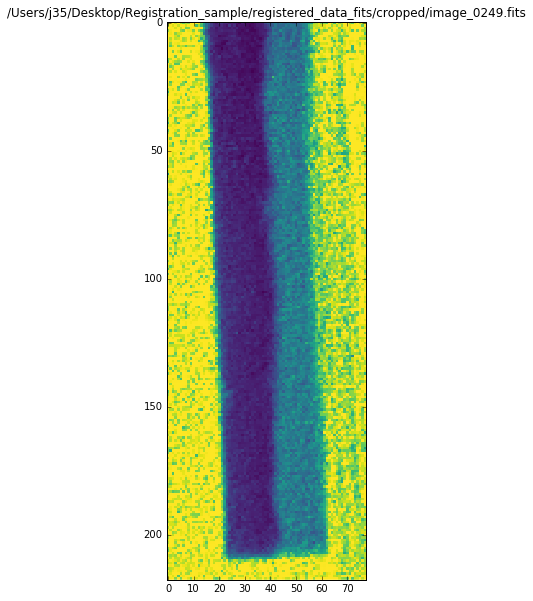

In [28]:
def plot_data(file_index):
    
    data = list_images[file_index]
    
    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)
    
    ax_img.imshow(data, interpolation='None', cmap='viridis')
    ax_img.set_title(list_of_files[file_index])
    
number_of_files = len(list_of_files)
display_data = interact(plot_data,
                       file_index = widgets.IntSlider(min=0, max=number_of_files, step=1, value=0, description='File Index'))

    

# User Input

In [29]:
reference_image_index = 595
start_registration_index = 0
stop_registration_index = 249

In [30]:
working_range = np.arange(start_registration_index, stop_registration_index+1)

## 3. Registration

Use first image as template (reference image)

In [31]:
im0 = list_images[reference_image_index]

Loop through all other images to find shift to apply to come back to first image position

In [32]:
def translate_array(old_array, xoffset, yoffset, index):
    '''
    shift image according to xoffset and yoffset given
    params:
        old_array: image to shift
        xoffset: offset in x axis
        yoffset; offset in y axis
        index: index of image (just for info message)
    return:
        new_array: image with xoffset and yoffset applied
    '''
    
    [ysize, xsize] = old_array.shape
    new_array = np.zeros((ysize, xsize))
    
    if False:
        print('working with image at index %d' %index)
        print('xoffset: %f' %xoffset)
        print('yoffset: %f' %yoffset)
        print()
        
    if (xoffset < 0):
        old_array_from_x = abs(xoffset)
        old_array_to_x = xsize
        new_array_from_x = 0
        new_array_to_x = xsize - abs(xoffset)

    elif (xoffset > 0):
        old_array_from_x = 0
        old_array_to_x = xsize - xoffset
        new_array_from_x = xoffset
        new_array_to_x = xsize
    
    else:
        old_array_from_x = 0
        old_array_to_x = xsize
        new_array_from_x = 0
        new_array_to_x = xsize
    
    if (yoffset < 0):
        old_array_from_y = abs(yoffset)
        old_array_to_y = ysize
        new_array_from_y = 0
        new_array_to_y = ysize - abs(yoffset)
    
    elif (yoffset > 0):
        old_array_from_y = 0
        old_array_to_y = ysize - yoffset
        new_array_from_y = yoffset
        new_array_to_y = ysize
    
    else:
        old_array_from_y = 0
        old_array_to_y = ysize
        new_array_from_y = 0
        new_array_to_y = ysize
   
    if False:
        print('working with x')
        print("old_array_from_x: %d" %old_array_from_x)
        print("old_array_to_x: %d" %old_array_to_x)
        print()
        print("new_array_from_x: %d" %new_array_from_x)
        print("new_array_to_x: %d" %new_array_to_x)

        print("\n")
        print("working with Y")
        print("old_array_from_y: %d" %old_array_from_y)
        print("old_array_to_y: %d" %old_array_to_y)
        print()
        print("new_array_from_y: %d" %new_array_from_y)
        print("new_array_to_y: %d" %new_array_to_y)
    
    
    new_array[new_array_from_y: new_array_to_y, new_array_from_x: new_array_to_x] = \
    old_array[old_array_from_y: old_array_to_y, old_array_from_x: old_array_to_x]
    
    return new_array

In [33]:
w = widgets.IntProgress()
w.max = (number_of_files-1)
display(w)

list_images_registered = []
list_images_registered.append(im0)
for index in range(1, number_of_files):
    
    im_index = list_images[index]

    if index in working_range:
        shift, error, diffphase = register_translation(im0, im_index)
        [yoffset, xoffset] = shift
        new_array = translate_array(im_index, int(xoffset), int(yoffset), index)
    else:
        new_array = im_index

    list_images_registered.append(new_array)
    
    w.value = index


## 4. Check Registered Images

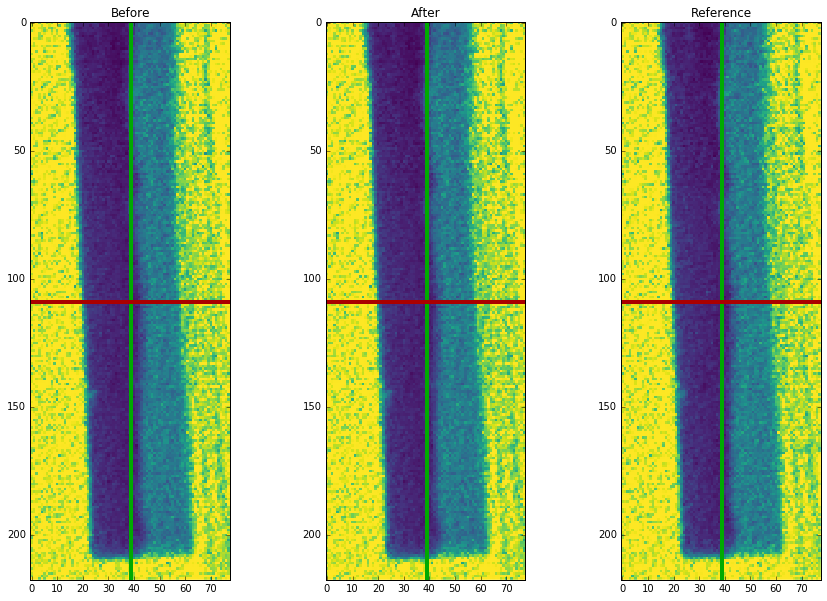

In [34]:
[height, width] = list_images_registered[0].shape

def plot_results(index, vline, hline):
    
    fig = plt.figure(figsize=(15,10))
    ax_img_b = plt.subplot(1,3,1)

    data_before = list_images[index]
    ax_img_b.imshow(data_before, cmap='viridis', interpolation='None')
    ax_img_b.set_title("Before")
    ax_img_b.axvline(vline, color="#00aa00", linewidth=4)
    ax_img_b.axhline(hline, color="#aa0000", linewidth=4)
    
    ax_img_a = plt.subplot(1,3,2)
    data_after = list_images_registered[index]
    ax_img_a.imshow(data_after, cmap='viridis', interpolation='None')
    ax_img_a.axvline(vline, color="#00aa00", linewidth=4)
    ax_img_a.axhline(hline, color="#aa0000", linewidth=4)
    ax_img_a.set_title('After')
    
    ax_img_c = plt.subplot(1,3,3)
    data_ref = list_images[reference_image_index]
    ax_img_c.imshow(data_ref, cmap='viridis', interpolation='None')
    ax_img_c.axvline(vline, color="#00aa00", linewidth=4)
    ax_img_c.axhline(hline, color="#aa0000", linewidth=4)
    ax_img_c.set_title('Reference')
    
interact(plot_results, 
        index = widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0),
        vline = widgets.IntSlider(min=0, max=width-1, step=1, value=width/2),
        hline = widgets.IntSlider(min=0, max=height-1, step=1, value=height/2))

## 5. Try to run registration a second time (on a narrower region of sample)

### a. Select region to base the calculation on

[31, 89, 182, 227]

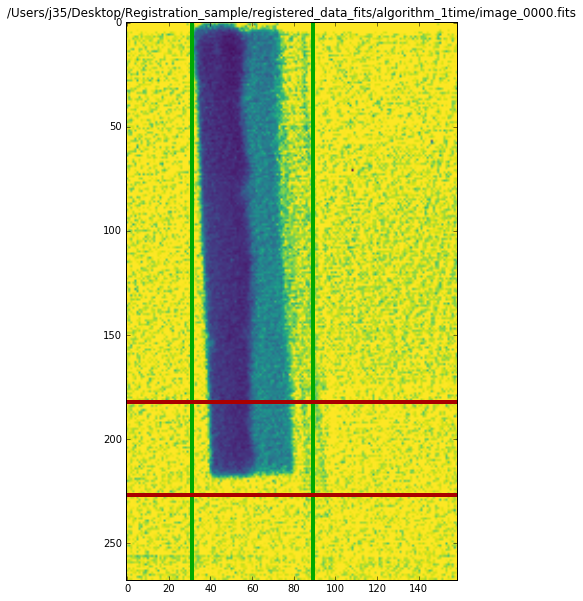

In [19]:
[height, width] = list_images_registered[0].shape

def plot_image_with_crop_region(file_index, x_left, x_right, y_top, y_bottom):

    data = list_images_registered[file_index]
    
    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data, cmap='viridis')
    ax_img.set_title(list_of_files[file_index])
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)   
    
    return [x_left, x_right, y_top, y_bottom]

number_of_files = len(list_of_files)
crop_registered = interact(plot_image_with_crop_region, 
        file_index =widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0, description='Image index'),
        x_left = widgets.IntSlider(min=0, max=width-1, step=1, value=0),
        x_right = widgets.IntSlider(min=0, max=width-1, step=1, value=width-1),
        y_top = widgets.IntSlider(min=0, max=height-1, step=1, value=0), 
        y_bottom = widgets.IntSlider(min=0, max=height-1, step=1, value=height-1))

In [20]:
[x_left, x_right, y_top, y_bottom] = crop_registered.widget.result
print('Region Selected:')
print('  left : %d' %x_left)
print('  right: %d' %x_right)
print('    top: %d' %y_top)
print(' bottom: %d' %y_bottom)

Region Selected:
  left : 31
  right: 89
    top: 182
 bottom: 227


In [21]:
im0 = list_images[reference_image_index][y_top: y_bottom, x_left: x_right]
w = widgets.IntProgress()
w.max = (number_of_files-1)
display(w)

list_images_registered_2 = []
list_images_registered_2.append(list_images[reference_image_index])

for index in range(1, number_of_files):
    
    im_index = list_images_registered[index]
    
    if index in working_range:
        im_index = im_index[y_top: y_bottom, x_left: x_right]
        shift, error, diffphase = register_translation(im0, im_index)
        [yoffset, xoffset] = shift
        new_array = translate_array(list_images_registered[index], int(xoffset), int(yoffset), index)
    else:
        new_array = im_index
        
    list_images_registered_2.append(new_array)
    
    w.value = index


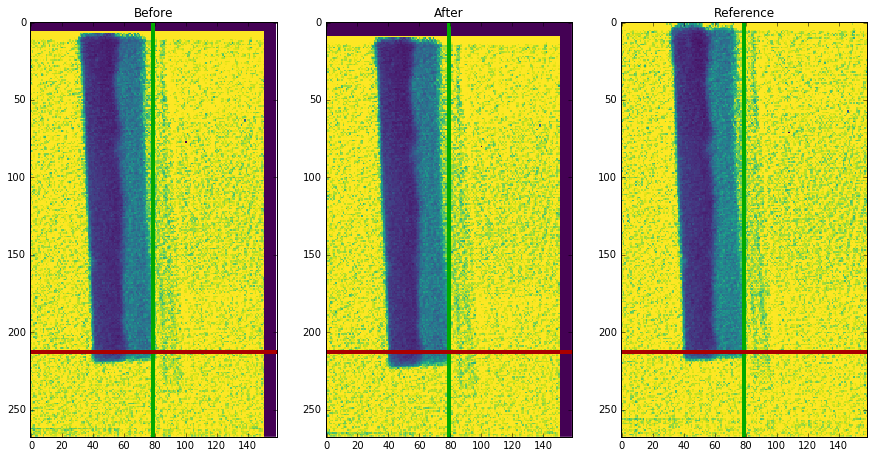

In [22]:
[height, width] = list_images_registered_2[0].shape

def plot_results(index, vline, hline):
    
    fig = plt.figure(figsize=(15,10))
    ax_img_b = plt.subplot(1,3,1)

    data_before = list_images[index]
    ax_img_b.imshow(data_before, cmap='viridis', interpolation='None')
    ax_img_b.set_title("Before")
    ax_img_b.axvline(vline, color="#00aa00", linewidth=4)
    ax_img_b.axhline(hline, color="#aa0000", linewidth=4)
    
    ax_img_a = plt.subplot(1,3,2)
    data_after = list_images_registered_2[index]
    ax_img_a.imshow(data_after, cmap='viridis', interpolation='None')
    ax_img_a.axvline(vline, color="#00aa00", linewidth=4)
    ax_img_a.axhline(hline, color="#aa0000", linewidth=4)
    ax_img_a.set_title('After')
    
    ax_img_c = plt.subplot(1,3,3)
    data_ref = list_images[reference_image_index]
    ax_img_c.imshow(data_ref, cmap='viridis', interpolation='None')
    ax_img_c.axvline(vline, color="#00aa00", linewidth=4)
    ax_img_c.axhline(hline, color="#aa0000", linewidth=4)
    ax_img_c.set_title('Reference')
    
interact(plot_results, 
        index = widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0),
        vline = widgets.IntSlider(min=0, max=width-1, step=1, value=width/2),
        hline = widgets.IntSlider(min=0, max=height-1, step=1, value=height/2))

## 6. Output Registered Images

In [37]:
list_items = ['TIFF', 'FITS']
file_format = widgets.Dropdown(options= list_items,
                              value = 'FITS',
                              allow_none = False,
                              sync = True,
                              help = """Select output file format""",
                              description = 'Select your file format')
display(file_format)

In [40]:
%gui qt
output_folder = gui_fname(dir = raw_data_folder)
%matplotlib inline

In [44]:
def get_full_file_name(full_name, output_folder, ext):
    if ext == 'fits':
        base_name = os.path.basename(full_name)
        return output_folder + '/' + base_name
    else:
        base_name = os.path.basename(full_name)
        base, ext = os.path.splitext(base_name)
        return output_folder + '/' + base + '.tiff'

pbar = widgets.IntProgress()
pbar.max = len(list_of_files)
display(pbar)
    
def save_fits():
    for index, file in enumerate(list_of_files):
        _data = list_images_registered_2[index]
        output_file_name = get_full_file_name(list_of_files[index], output_folder, 'fits')
        hdu = pyfits.PrimaryHDU(_data)
        hdu.writeto(output_file_name)
        pbar.value = index
        
def save_tiff():
    for index, file in enumerate(list_of_files):
        data = list_images_registered_2[index]
        _data = Image.fromarray(np.float32(data))
        output_file_name = get_full_file_name(list_of_files[index], output_folder, 'tiff')
        _data.save(output_file_name)
        pbar.value = index
        
if file_format.value == 'FITS':
    save_fits()
else:
    save_tiff()
        
        